In [52]:
import dataset
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
db = dataset.connect(os.environ['POSTGRES_URI'])
games_df = pd.read_sql('SELECT * FROM game_crawl_view;', os.environ['POSTGRES_URI'], index_col='steam_app_id',
                      parse_dates=['release_date', 'crawl_time'])
games_df.head()

,crawl_time,game_name,short_description,reviews_last_30_days,pct_positive_reviews_last_30_days,reviews_all_time,pct_positive_reviews_all_time,release_date,title,developer,publisher,num_achievements,full_price,long_description,metacritic_score,is_dlc,genres,details,tags
steam_app_id,,,,,,,,,,,,,,,,,,,
5,2017-04-25 01:45:36.531985+00:00,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaN,NaN,None,NaN,None,None,None,None
7,2017-04-25 01:45:49.480343+00:00,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaN,NaN,None,NaN,None,None,None,None
8,2017-04-25 01:46:01.917411+00:00,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaN,NaN,None,NaN,None,None,None,None
10,2017-04-25 01:46:15.009013+00:00,Counter-Strike,Play the world's number 1 online action game. ...,745.0,96.0,39394.0,97.0,2000-11-01,Counter-Strike,Valve,Valve,NaN,9.99,ABOUT THIS GAME\nPlay the world's number 1 onl...,88.0,False,[Action],"[Multi-player, Valve Anti-Cheat enabled]","[Action, FPS, Multiplayer, Shooter, Classic, T..."
20,2017-04-25 01:46:28.021976+00:00,Team Fortress Classic,One of the most popular online action games of...,35.0,71.0,1842.0,81.0,1999-04-01,Team Fortress Classic,Valve,Valve,NaN,4.99,ABOUT THIS GAME\nOne of the most popular onlin...,NaN,False,[Action],"[Multi-player, Valve Anti-Cheat enabled]","[Classic, Shooter, Class-Based, Team-Based, Fi..."


How many apps did we crawl in total?

In [4]:
len(games_df)

40216

And how many of these did we actually get info for?

In [5]:
games_df = games_df[~pd.isnull(games_df['game_name'])]
len(games_df)

26525

How many games vs DLC?

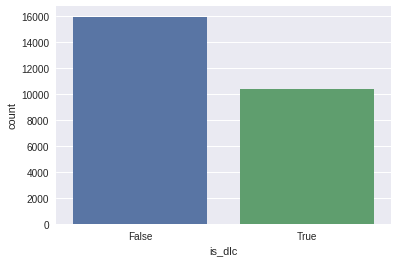

In [6]:
sns.countplot(x='is_dlc', data=games_df)

Looking at only games from now on...

In [7]:
games_df = games_df[games_df['is_dlc'] == False]

Counts by various columns

In [8]:
games_df['publisher'].value_counts()

Ubisoft                                      142
Big Fish Games                               137
SEGA                                         134
Strategy First                               133
THQ Nordic                                   106
KISS ltd                                     103
Sekai Project                                 97
KOEI TECMO GAMES CO., LTD.                    97
Square Enix                                   93
Degica                                        79
Choice of Games                               77
Devolver Digital                              70
Activision                                    68
Paradox Interactive                           67
1C Company                                    65
Buka Entertainment                            63
United Independent Entertainment GmbH         58
Daedalic Entertainment                        57
Focus Home Interactive                        52
MumboJumbo                                    52
Slitherine Ltd.     

In [9]:
games_df['developer'].value_counts()

KOEI TECMO GAMES CO., LTD.                                98
Choice of Games                                           77
SEGA                                                      57
MumboJumbo                                                45
Humongous Entertainment                                   36
Hosted Games                                              36
Telltale Games                                            36
HeR Interactive                                           33
Valve                                                     31
EnsenaSoft                                                30
Warfare Studios                                           30
Milestone S.r.l.                                          26
Daedalic Entertainment                                    26
Winged Cloud                                              25
Bohemia Interactive                                       23
Ubisoft Montreal                                          23
Paradox Development Stud

Plotting various review metrics

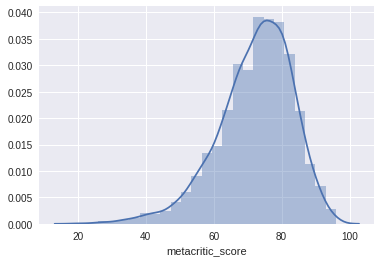

In [45]:
sns.distplot(games_df['metacritic_score'].dropna(), bins=25)

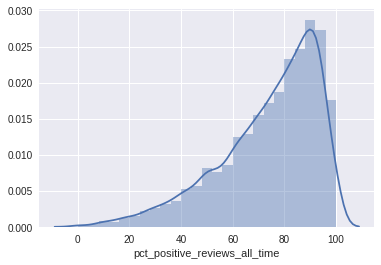

In [46]:
sns.distplot(games_df['pct_positive_reviews_all_time'].dropna(), bins=25)

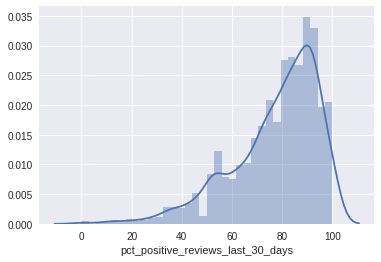

In [14]:
sns.distplot(games_df['pct_positive_reviews_last_30_days'].dropna())

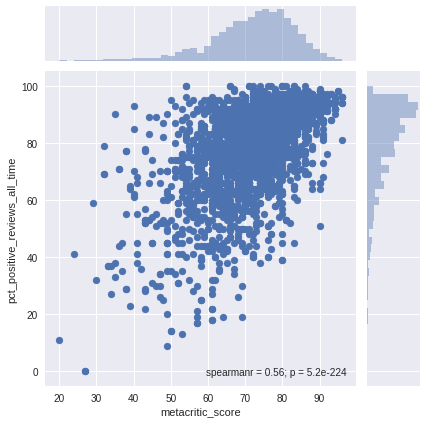

In [29]:
nonnull_reviews_df = games_df[
    ~pd.isnull(games_df['metacritic_score'])
    & ~pd.isnull(games_df['pct_positive_reviews_all_time'])
]
sns.jointplot(x='metacritic_score', y='pct_positive_reviews_all_time', data=nonnull_reviews_df,
              stat_func=scipy.stats.spearmanr)

Some of those scores are really low... curious what the games are

In [24]:
def find_worst_games(metric):
    return (nonnull_reviews_df.sort_values(
        metric
    )[:5][['game_name', 'pct_positive_reviews_all_time', 'metacritic_score']])

In [25]:
find_worst_games('pct_positive_reviews_all_time')

,game_name,pct_positive_reviews_all_time,metacritic_score
steam_app_id,,,
210500,Fray: Reloaded Edition,0.0,27.0
210490,Fray: Reloaded Edition,0.0,27.0
256050,Adventure Park,9.0,49.0
238870,Citadels,11.0,20.0
216130,Gemini Wars,13.0,53.0


In [26]:
find_worst_games('metacritic_score')

,game_name,pct_positive_reviews_all_time,metacritic_score
steam_app_id,,,
238870,Citadels,11.0,20.0
10220,Postal III,41.0,24.0
210500,Fray: Reloaded Edition,0.0,27.0
210490,Fray: Reloaded Edition,0.0,27.0
22310,Rogue Warrior,59.0,29.0


In [49]:
def find_best_games(metric):
    return (nonnull_reviews_df.sort_values(
        metric, ascending=False
    )[:5][['game_name', 'pct_positive_reviews_all_time', 'metacritic_score']])

In [50]:
find_best_games('pct_positive_reviews_all_time')

,game_name,pct_positive_reviews_all_time,metacritic_score
steam_app_id,,,
267980,Hostile Waters: Antaeus Rising,100.0,80.0
470800,She Remembered Caterpillars,100.0,83.0
375170,Gunpowder,100.0,76.0
373990,Metrico+,100.0,66.0
366780,Magical Eyes - Red is for Anguish,100.0,77.0


In [51]:
find_best_games('metacritic_score')

,game_name,pct_positive_reviews_all_time,metacritic_score
steam_app_id,,,
70,Half-Life,96.0,96.0
219,Half-Life 2,96.0,96.0
220,Half-Life 2,96.0,96.0
7710,BioShock™,94.0,96.0
7670,BioShock™,94.0,96.0
